In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
variance = 16
mean =10

In [3]:
pop = np.random.normal(mean,np.sqrt(variance),10000)

In [4]:
def draw_repeated_samples(pop, sizes, draws=100):
    for s in sizes:
        for i in np.arange(draws):
            draw = np.random.choice(pop, s)
            yield {'draw': i, 
                   'mean': draw.mean(), 
                   'std': draw.std(),
                   'var': draw.var(),
                   'sample_size':s}


In [5]:
sizes = [3] + list(np.arange(5,60,5))
sizes

[3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

In [6]:
df = pd.DataFrame(draw_repeated_samples(pop, sizes, draws=300))

In [7]:
df.head()

,draw,mean,sample_size,std,var
0,0,10.885981,3,1.585839,2.514884
1,1,9.025235,3,2.505261,6.276332
2,2,10.139492,3,1.943004,3.775266
3,3,7.319210,3,0.610950,0.373260
4,4,9.957232,3,1.142737,1.305847


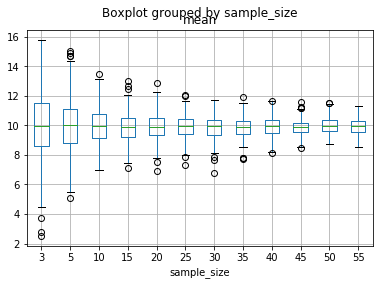

In [8]:
df.boxplot('mean', by='sample_size')

- The sample mean is an unbiased estimator of the population mean. The distribution of the calculated means across many samples is centered around the true mean.
- There is a degree of variation in across the different means calculated in different samples. This is the standard error, which we can visualise as the dispersion in the above chart.
- The standard error falls (precision increases) as our sample size increases.

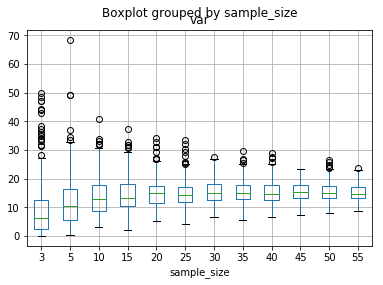

In [9]:
df.boxplot('var', by='sample_size')

- In small samples, the sample variance is a BIASED estimator of the population variance. It underestimates it.
- As the sample size increases, the average of the variances calculated across many samples converges to the true value.

In [10]:
df['var_adj']=df.apply(lambda x: x['var']*x['sample_size']/(x['sample_size']-1), axis=1)

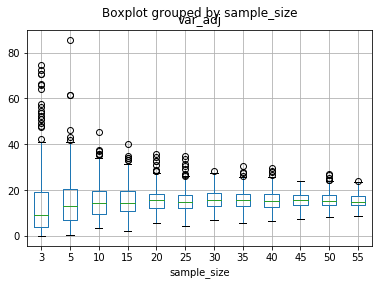

In [11]:
df.boxplot('var_adj', by='sample_size')

- The '/(n-1)' adjustment attenuates the bias, although it does not completely remove it. It is considered a good rule of thumb.